In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [9]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, 
        postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM weatherinszeged', con = engine)

engine.dispose()

df.head(5)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df['preciptype'].unique()

array(['rain', 'snow', 'null'], dtype=object)

Am I supposed to use multiple dummy variables, one for rain, one for snow and one for no precipitation?

In [11]:
Y = df['temperature']

X = df[['humidity', 'windspeed', 'windbearing', 'pressure']]
#Setting up the linear regression model

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)

print('Coefficients:', lrm.coef_)
print('Intercept', lrm.intercept_)

Coefficients: [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Intercept 37.9264381852854


In [12]:
#Checking to see if the erros average out to 0 
predictions = lrm.predict(X)
errors = Y - predictions

print(np.mean(errors))

-6.282637831541205e-15


The average error is so small as to be irrelevent. 

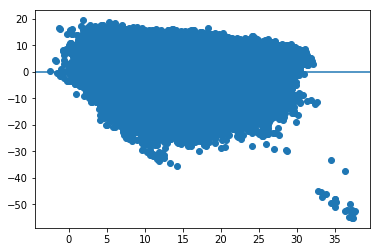

In [14]:
#Attempting to find homoscedasticity or heteroscedasticity. 
#I have no idea what this graph means
plt.scatter(predictions, errors)
plt.axhline(y = 0)

I have no idea what the above graph means

In [15]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The P tests are less then .05 so the errors are heteroscedastic.  

The Levene and Bartlett tests have a null hypothesis of homoscedastic, less then .05 on the p value means we reject the null hypothesis. 

A model is homoscedastic when the distribution of its error terms(scedasticity) is consistent for all predicted values.  In the above example they are not evenly distributed.

I could use some help in understanding what the perfect multicollinearity looks like in practice with using dummy variables. 

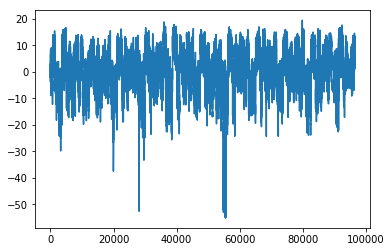

In [16]:
plt.plot(errors)

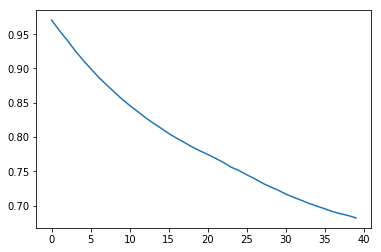

In [17]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Ok that definitely looks like some kind of pattern and it looks like the correlation goes from almost 1 down to .7, which is still pretty high

In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

The null hypothesis of the normaltest and jarque_bera tests is that the errors are normally distributed. 

In [19]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252366 and p value is 0.0
Normality test statistics is 3375.432307699586 and p value is 0.0


I do not know what to do at this point to add to the assignemnt.  Many of the Gauss-Markov conditions have been broken so I am pretty sure this is going to decrease the effectiveness of the model. 